In [18]:
from qiskit import execute, transpile
from qiskit_rigetti import RigettiQCSProvider, QuilCircuit
from qiskit.visualization import plot_histogram

In [22]:
qc =QuilCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

In [28]:
provider = RigettiQCSProvider()
backend = provider.get_backend('Aspen-11')

In [34]:
circ = transpile(qc, backend)

In [30]:
circ.draw()

┌─────────┐      ░ ┌─┐   
   q_0: ┤ U2(0,π) ├──■───░─┤M├───
        └─────────┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ───────────┤ X ├─░──╫─┤M├
                   └───┘ ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1

In [32]:
result = backend.run(circ, shots = 1024, ensure_native_quil=True).result().get_counts()

QCSHTTPStatusError: QCS API call POST https://api.qcs.rigetti.com/v1/quantumProcessors/Aspen-11:translateNativeQuilToEncryptedBinary failed with status 400: {"code":"translation_error","message":"ProtoQuil validation failed: DEFCIRCUIT QASM_u3(%theta, %phi, %lambda) q:\n    RZ(%lambda) q\n    RY(%theta) q\n    RZ(%phi) q is not allowed.","requestId":"630ef07e-adc1-4988-bd58-4d501224e1cf"}

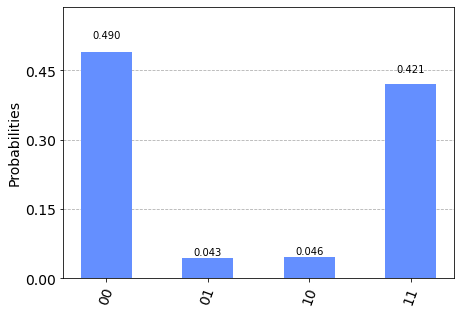

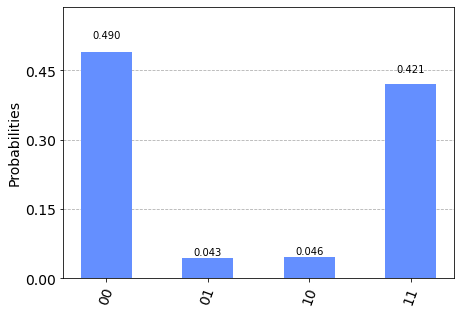

In [27]:
plot_histogram(result)